<a href="https://colab.research.google.com/github/Oludairo/Stellar_Classification/blob/main/stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [8]:
df.rename(columns = {"u":"Ultraviolet filter", "g":"Green filter", "r":"Red filter", "i":"Near Infrared filter", "z":"Infrared filter"}, inplace=True)

In [9]:
df

,obj_ID,alpha,delta,Ultraviolet filter,Green filter,Red filter,Near Infrared filter,Infrared filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


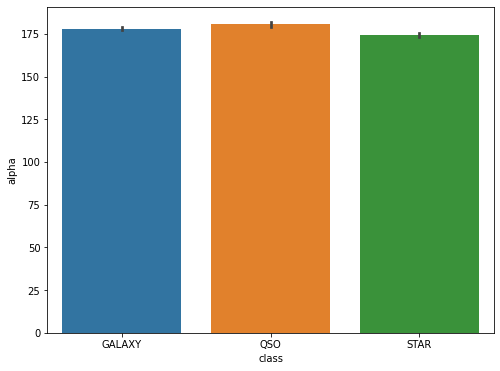

In [10]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='alpha', data=df)

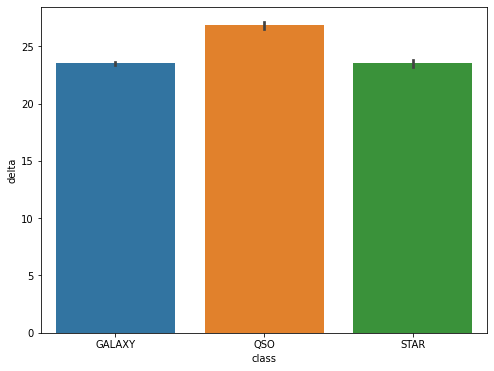

In [11]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='delta', data=df)

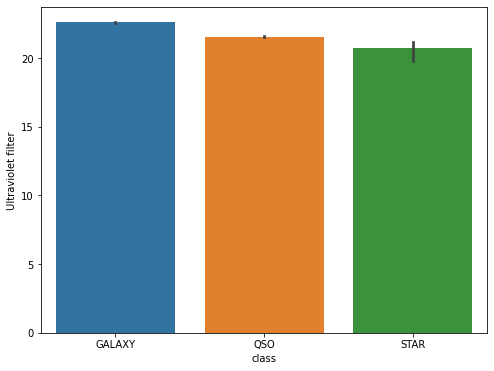

In [12]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='Ultraviolet filter', data=df)

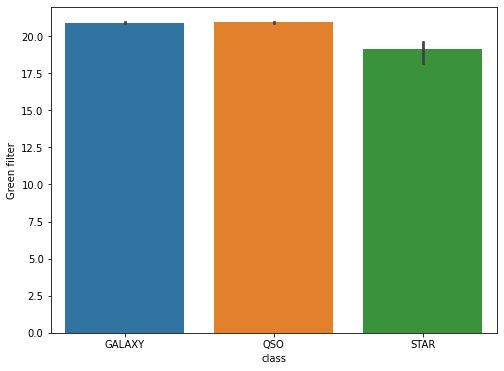

In [13]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='Green filter', data=df)

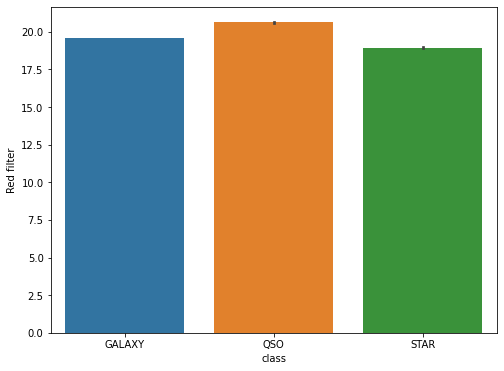

In [14]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='Red filter', data=df)

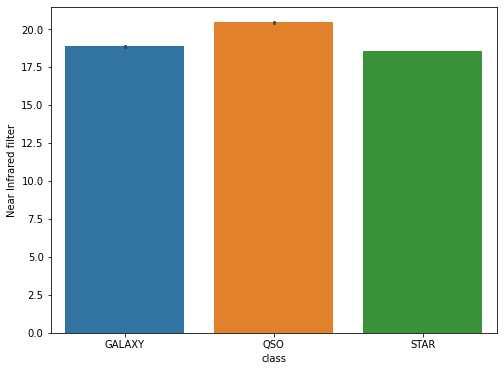

In [15]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='Near Infrared filter', data=df)

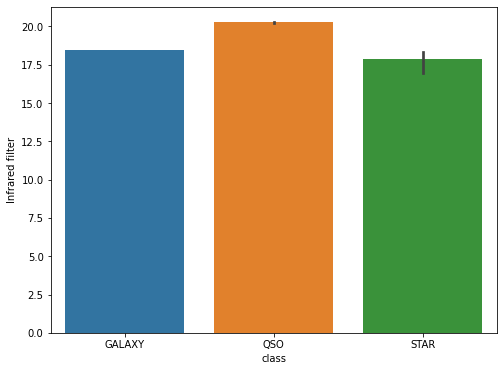

In [16]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='Infrared filter', data=df)

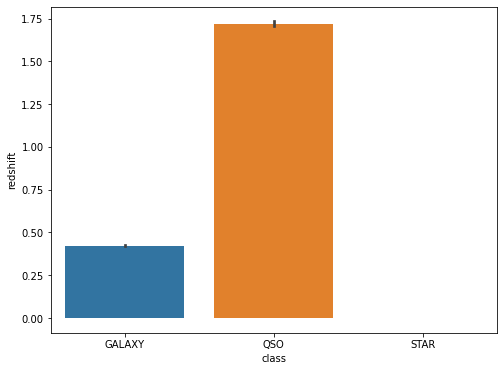

In [17]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='redshift', data=df)

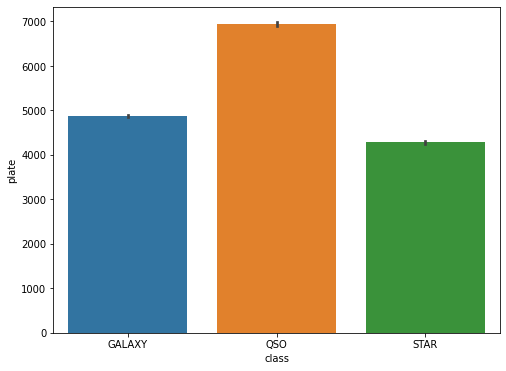

In [18]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='plate', data=df)

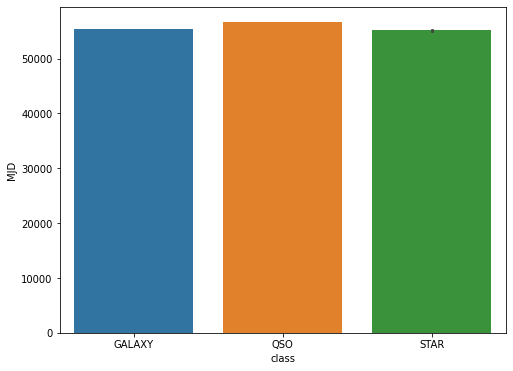

In [19]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='MJD', data=df)

In [20]:
df.isna().sum()

obj_ID                  0
alpha                   0
delta                   0
Ultraviolet filter      0
Green filter            0
Red filter              0
Near Infrared filter    0
Infrared filter         0
run_ID                  0
rerun_ID                0
cam_col                 0
field_ID                0
spec_obj_ID             0
class                   0
redshift                0
plate                   0
MJD                     0
fiber_ID                0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   obj_ID                100000 non-null  float64
 1   alpha                 100000 non-null  float64
 2   delta                 100000 non-null  float64
 3   Ultraviolet filter    100000 non-null  float64
 4   Green filter          100000 non-null  float64
 5   Red filter            100000 non-null  float64
 6   Near Infrared filter  100000 non-null  float64
 7   Infrared filter       100000 non-null  float64
 8   run_ID                100000 non-null  int64  
 9   rerun_ID              100000 non-null  int64  
 10  cam_col               100000 non-null  int64  
 11  field_ID              100000 non-null  int64  
 12  spec_obj_ID           100000 non-null  float64
 13  class                 100000 non-null  object 
 14  redshift              100000 non-null  float64
 15  p

In [22]:
df.describe()

,obj_ID,alpha,delta,Ultraviolet filter,Green filter,Red filter,Near Infrared filter,Infrared filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [23]:
shape1 = df.shape

for column in df.select_dtypes(include="number").columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    minimum = q1-(1.5*iqr)
    maximum = q3+(1.5*iqr)
   
    min_in = df[df[column] < minimum].index
    max_in = df[df[column] > maximum].index
   
    df.drop(min_in, inplace=True)
    df.drop(max_in, inplace=True)

shape2 = df.shape

outliers = shape1[0] - shape2[0]

print("Total count of deleted outliers: ",outliers)

Total count of deleted outliers:  14266


In [24]:
df.shape

(85734, 18)

In [25]:
df.describe()

,obj_ID,alpha,delta,Ultraviolet filter,Green filter,Red filter,Near Infrared filter,Infrared filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,8.573400e+04,85734.000000,85734.000000,85734.000000,85734.000000,85734.000000,85734.000000,85734.000000,85734.000000,85734.0,85734.000000,85734.000000,8.573400e+04,85734.000000,85734.000000,85734.000000,85734.000000
mean,1.237665e+18,180.039034,24.735713,22.127512,20.622700,19.563316,18.962771,18.633168,4466.132398,301.0,3.520482,160.714081,5.684634e+18,0.399332,5048.860242,55536.844869,444.784846
std,8.428970e+12,96.007941,19.642233,2.294944,2.083221,1.857995,1.720346,1.714456,1962.529660,0.0,1.589222,104.719818,3.298703e+18,0.393652,2929.820590,1799.036470,271.790830
min,1.237646e+18,0.005528,-18.785328,15.358420,14.318450,13.990440,13.862170,13.805350,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,129.680285,6.712157,20.281570,18.789830,17.915630,17.526260,17.283248,3180.000000,301.0,2.000000,78.000000,2.748465e+18,0.027034,2441.000000,54174.000000,217.000000
50%,1.237663e+18,180.487177,24.558848,22.290405,21.121970,20.026135,19.284495,18.882110,4187.000000,301.0,4.000000,139.000000,5.464170e+18,0.352233,4853.000000,55857.000000,426.000000
75%,1.237668e+18,236.076354,40.379601,23.804455,22.201420,20.976333,20.203133,19.745452,5330.000000,301.0,5.000000,219.000000,8.171856e+18,0.606710,7258.000000,56720.000000,638.000000
max,1.237681e+18,359.999810,83.000519,28.618680,26.817360,25.377300,24.371220,23.592280,8162.000000,301.0,6.000000,479.000000,1.412694e+19,1.696212,12547.000000,58932.000000,1000.000000


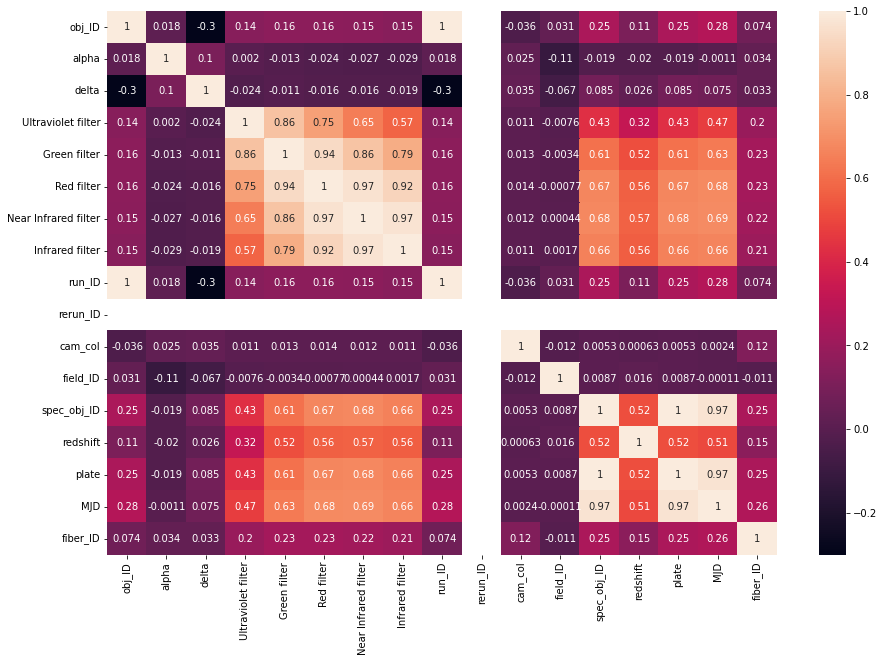

In [26]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True, cmap=None)

In [27]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
df[["class_en"]] = encode.fit_transform(df[["class"]])

In [28]:
df_n = df.drop(columns= ["class"])

In [29]:
df_n

,obj_ID,alpha,delta,Ultraviolet filter,Green filter,Red filter,Near Infrared filter,Infrared filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_en
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,0.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,0.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,0.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,0.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1.237663e+18,317.246996,-0.682254,20.96526,19.81625,19.34186,19.14711,19.05790,4187,301,2,64,1.154061e+18,0.175206,1025,53239,51,0.0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,0.0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,0.0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,0.0


In [30]:
df_n['class_en'].value_counts()

0.0    55585
2.0    20408
1.0     9741
Name: class_en, dtype: int64

In [31]:
X = df_n.drop(columns = ['class_en', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID','obj_ID', 'Near Infrared filter', 'Red filter'])
y = df_n['class_en']

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
def calcu_mult(df_n):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [34]:
calcu_mult(X)

,variables,VIF
0,alpha,4.585089
1,delta,2.663349
2,Ultraviolet filter,426.152655
3,Green filter,836.867167
4,Infrared filter,409.529187
5,cam_col,5.914938
6,redshift,3.291237
7,plate,6.397301
8,MJD,264.087843


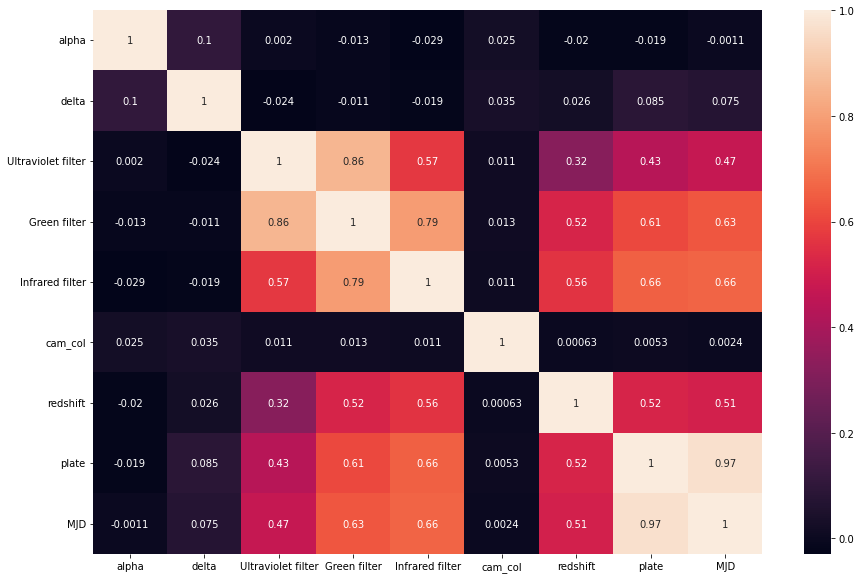

In [35]:
plt.figure(figsize = (15, 10))
sns.heatmap(X.corr(), annot=True, cmap=None)

In [36]:
y.value_counts()

0.0    55585
2.0    20408
1.0     9741
Name: class_en, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sampl = SMOTE()
X, y = sampl.fit_resample(X, y)

In [39]:
y.value_counts()

0.0    55585
1.0    55585
2.0    55585
Name: class_en, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scale = StandardScaler()
X_train_norm = pd.DataFrame(scale.fit_transform(X_train))

In [43]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_train_norm, y_train, test_size = 0.25, random_state=42)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components= 9)
model = pca.fit(X_train_scale)
PCA(n_components= 9)
print(model.explained_variance_ratio_)

[0.42440426 0.13717687 0.1161675  0.11079436 0.0952942  0.07425317
 0.03136833 0.00754516 0.00299615]


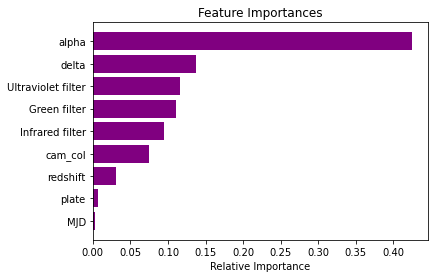

In [46]:
features = X.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()
log_result = model.fit(X_train_scale, y_train_scale)

In [49]:
coef_deter = log_result.score(X_train_scale, y_train_scale)
coef_deter

0.9461685306787403

In [50]:
y_predict = log_result.predict(X_test_scale)

In [51]:
y_predict

array([2., 0., 0., ..., 2., 0., 0.])

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test_scale, y_predict)

array([[10358,   593,   256],
       [  935, 10087,     1],
       [    0,     0, 11121]])

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test_scale, y_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     11207
         1.0       0.94      0.92      0.93     11023
         2.0       0.98      1.00      0.99     11121

    accuracy                           0.95     33351
   macro avg       0.95      0.95      0.95     33351
weighted avg       0.95      0.95      0.95     33351



In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print("ac_score: ", accuracy_score(y_test_scale, y_predict))

ac_score:  0.9464783664657731


In [58]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)

In [59]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_result, X_test_scale, y_test_scale, scoring="accuracy", cv=cv, n_jobs=1, error_score="raise")
np.mean(score)

0.9435773480166393

In [60]:
from sklearn.svm import SVC

In [61]:
model = SVC(kernel='rbf', random_state=1, decision_function_shape='ovr', probability=True)
svc_result = model.fit(X_train_scale, y_train_scale)

In [62]:
y_predict = svc_result.predict(X_test_scale)

In [63]:
y_predict

array([2., 0., 0., ..., 2., 0., 0.])

In [64]:
confusion_matrix(y_test_scale, y_predict)

array([[10664,   299,   244],
       [  719, 10296,     8],
       [    1,     0, 11120]])

In [65]:
print(classification_report(y_test_scale, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     11207
         1.0       0.97      0.93      0.95     11023
         2.0       0.98      1.00      0.99     11121

    accuracy                           0.96     33351
   macro avg       0.96      0.96      0.96     33351
weighted avg       0.96      0.96      0.96     33351



In [66]:
print("ac_score: ", accuracy_score(y_test_scale, y_predict))

ac_score:  0.9618901981949567


In [67]:
score = cross_val_score(svc_result, X_test_scale, y_test_scale, scoring="accuracy", cv=cv, n_jobs=1, error_score="raise")
np.mean(score)

0.9576549090562633

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model= RandomForestClassifier(criterion='gini', max_depth=2, random_state=0)
rfc_result = model.fit(X_train_scale, y_train_scale)

In [70]:
y_predict = rfc_result.predict(X_test_scale)

In [71]:
y_predict

array([2., 0., 0., ..., 2., 0., 0.])

In [72]:
confusion_matrix(y_test_scale, y_predict)

array([[ 9267,  1850,    90],
       [ 2307,  8716,     0],
       [    0,     0, 11121]])

In [73]:
print(classification_report(y_test_scale, y_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81     11207
         1.0       0.82      0.79      0.81     11023
         2.0       0.99      1.00      1.00     11121

    accuracy                           0.87     33351
   macro avg       0.87      0.87      0.87     33351
weighted avg       0.87      0.87      0.87     33351



In [74]:
print("ac_score: ", accuracy_score(y_test_scale, y_predict))

ac_score:  0.8726574915294893


In [75]:
score = cross_val_score(rfc_result, X_test_scale, y_test_scale, scoring="accuracy", cv=cv, n_jobs=1, error_score="raise")
np.mean(score)

0.8728373560521897

In [76]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [77]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [78]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [79]:
classes = svc_result.classes_
classes
y_prob = svc_result.predict_log_proba(X_test_scale)

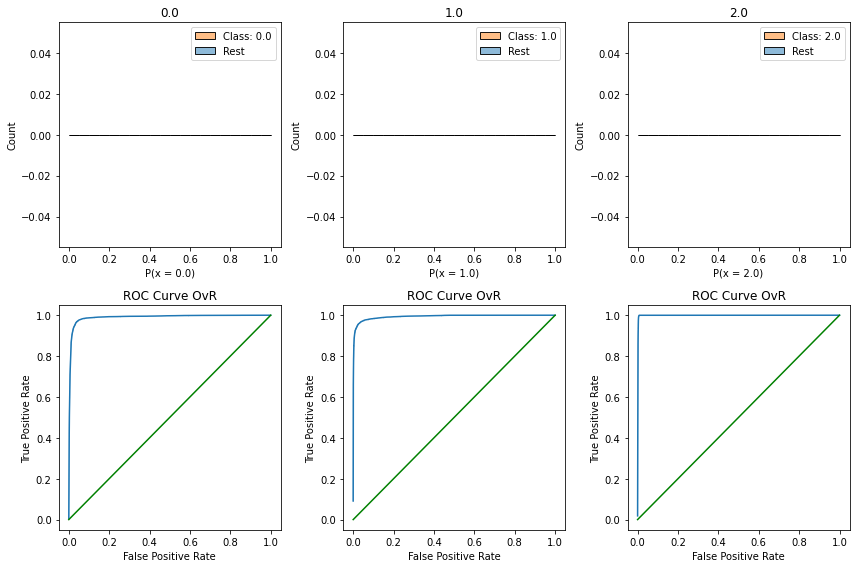

In [80]:
from sklearn.metrics import roc_auc_score

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test_scale.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test_scale]
    df_aux['prob'] = y_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [83]:
import shap

In [ ]:
explainer = shap.Explainer(svc_result.predict, X_test_scale)
shap_values = explainer(X_test)

Exact explainer:   0%|          | 99/33351 [1:09:57<396:09:14, 42.89s/it]

In [ ]:
shap_values = explainer.shap_values(X)
shap.bar_plot(shap_values)